In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tsa_utils
#import png
import tensorflow as tf
import pickle
import cv2
import skimage
import pandas as pd 
from sklearn.preprocessing import scale

In [7]:
#Model parameters
DATA_PATH="../tsa_data/images/"
CHECKPOINT_PATH="../tsa_data/multi_class/"
MODEL_ID="pca6"

tf.logging.set_verbosity(tf.logging.INFO)
# pca_model = pickle.load(open("../tsa_data/pca_models/medium_safe_pca.p","rb"))


In [8]:
matplotlib.rc('animation', html='html5')

def plot_image(path):
    data = tsa_utils.read_data(path)
    fig = mpl.pyplot.figure(figsize = (16,16))
    ax = fig.add_subplot(111)
    def animate(i):
        im = ax.imshow(np.flipud(data[:,:,i].transpose()), cmap = 'viridis')
        return [im]
    return matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,data.shape[2]), interval=200, blit=True)

(660, 512)
(16, 660, 512)


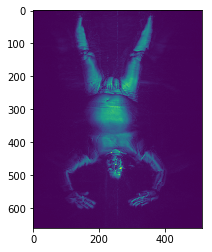

(660, 512)
(16, 660, 512)


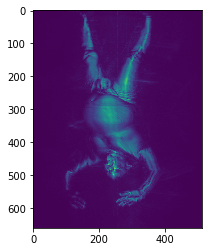

(660, 512)
(16, 660, 512)


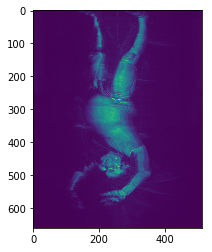

(660, 512)
(16, 660, 512)


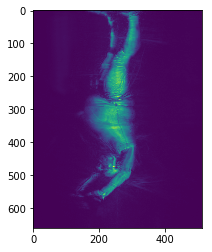

(660, 512)
(16, 660, 512)


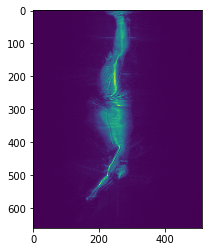

(660, 512)
(16, 660, 512)


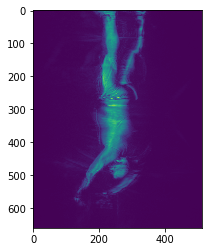

(660, 512)
(16, 660, 512)


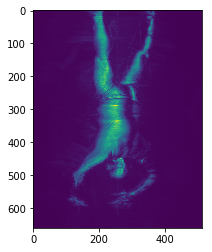

(660, 512)
(16, 660, 512)


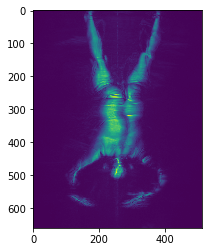

(660, 512)
(16, 660, 512)


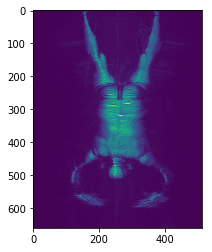

(660, 512)
(16, 660, 512)


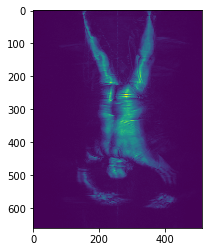

(660, 512)
(16, 660, 512)


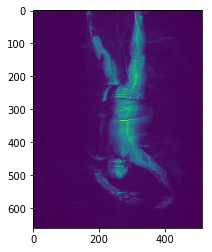

(660, 512)
(16, 660, 512)


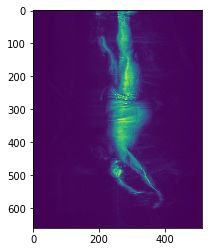

(660, 512)
(16, 660, 512)


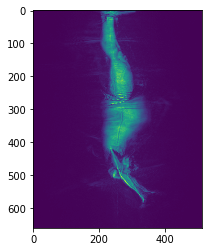

(660, 512)
(16, 660, 512)


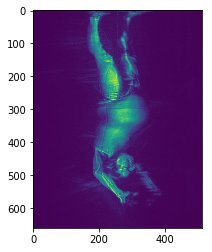

(660, 512)
(16, 660, 512)


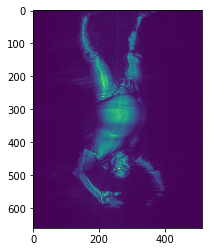

(660, 512)
(16, 660, 512)


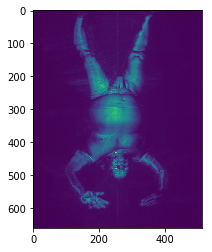

In [19]:
data =tsa_utils.read_data("../tsa_data/images/0749d03b6d2d1eebb6c24ecb3c36e645.aps")
transformed_data = []
for i in range(0,16):
    increment = 10
#     print(data[(i * increment):(i * increment) + 170,:,i])
    #transformed_data.append(data[(i * increment) + 50:(i * increment) + 320,:,i])
    print(data[i,:,:].shape)
    plt.imshow(data[i,:,:])
    print(data.shape)
    plt.show()

In [42]:
class Residue:
    def __init__(self, ids, data_path, pca_model, repeating=True):
        self.ids=ids
        self.data_path=data_path
        self.i = -1
        self.repeating = repeating
        self.pca_model = pca_model

    def calculate_residue(self, data):
        transformed = self.pca_model.transform(data)
        reverse_transformed = self.pca_model.inverse_transform(transformed) 
        reverse_transformed = reverse_transformed[0]
        data = data[0]
        binary_transformed = reverse_transformed.copy()
        binary_transformed[reverse_transformed > 220] = 0
        binary_transformed[reverse_transformed < 220] = 1
        binary_data = data.copy()
        binary_data[data > 1] = 0
        binary_data[data < 1] = 1
        diff = binary_data - binary_transformed
        diff[diff==0] = 0
        diff[diff>0] = 255
        return diff

    def scale_array(self, array):
        mn = np.min(array)
        mx = np.max(array)
        return np.uint8((array - mn)*255/(mx - mn))

    def build_residue(self):
        data = [np.stack(self.load_thresholded_image(self.data_path + self.ids[self.i] +  ".aps")).flatten()]
        data = self.calculate_residue(data)
        data = skimage.measure.block_reduce(data.reshape(16, 660, 512, order="A"), (1,16,16), np.mean)
        data = data.astype("float32")
        return data

    def load_thresholded_image(self, image_path):
        data = tsa_utils.read_data(image_path).reshape(16 * 660, 512, order="A")
        data *= 255/data.max() 
        data = data.astype(np.uint8)
        return cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,5)
        #return cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,25,3)

In [4]:


data = tsa_utils.read_data(DATA_PATH + "/087d7648e320f02c2c41e029f6cc2cd0.aps").reshape(16 * 660, 512, order="A")
data *= 255/data.max() 
print(data.shape)
data = data.astype(np.uint8)
data = cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,5)
data = data.astype(np.float64)

transformed = pca_model.transform([data.flatten()])
reverse_transformed = pca_model.inverse_transform(transformed) 
reverse_transformed = reverse_transformed[0]

reverse_transformed *= 255/reverse_transformed.max() 
reverse_transformed = reverse_transformed.astype(np.uint8)
reverse_transformed = cv2.adaptiveThreshold(reverse_transformed,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,91,5)
reverse_transformed = reverse_transformed.astype(np.float64)
reverse_transformed *= 255.0/reverse_transformed.max() 

reverse_transformed = reverse_transformed.flatten().astype(np.float64)
binary_transformed = reverse_transformed.copy()
binary_transformed[reverse_transformed > 220] = 0
binary_transformed[reverse_transformed < 220] = 1
data = data.flatten()
binary_data = data.copy()
binary_data[data > 1] = 0
binary_data[data < 1] = 1


diff = binary_data.flatten() - binary_transformed
diff = diff.reshape(-1,512)
diff[diff<=0] = 0
diff[diff>0] = 1

diff = diff.reshape(16,-1,512)
diff = skimage.measure.block_reduce(diff, (1,16,16), np.mean)
for i in range (0,16):
    #plt.imshow(diff[i*41:(i+1)*41])
    plt.imshow(diff[i])
    plt.show()

(10560, 512)


NameError: name 'pca_model' is not defined

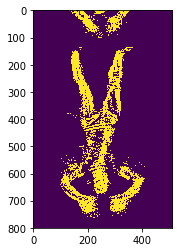

In [238]:
plt.imshow(binary_transformed.reshape(-1,512)[-800:])
plt.show()

In [232]:
diff = binary_data.flatten() - binary_transformed
diff = diff.reshape(-1,512)
diff[diff<=0] = 0
diff[diff>0] = 1

In [233]:
sum(diff)

array([      0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,      

In [158]:
diff.min()

0

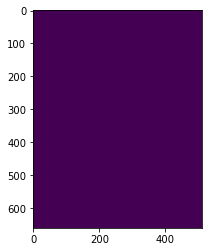

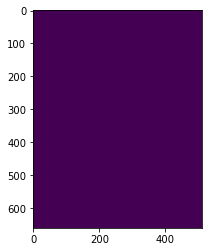

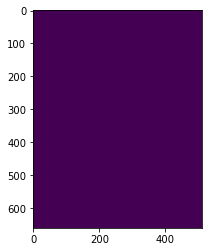

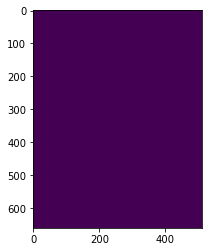

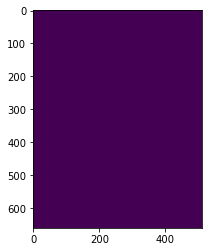

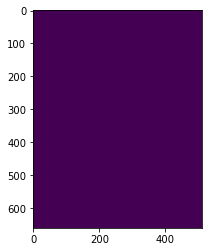

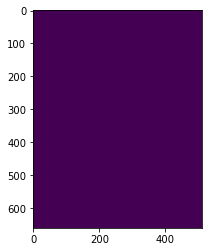

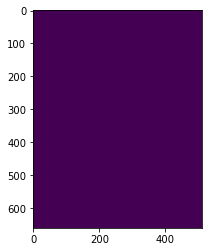

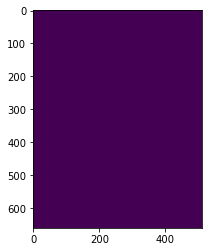

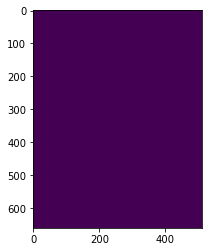

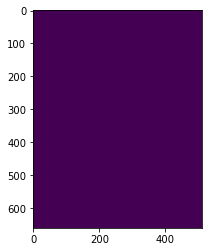

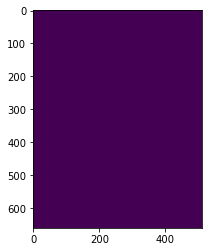

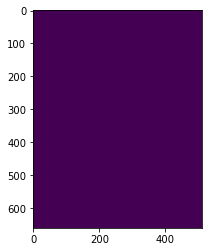

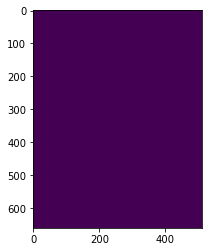

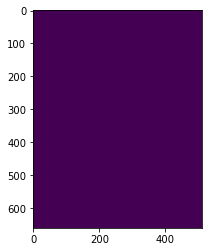

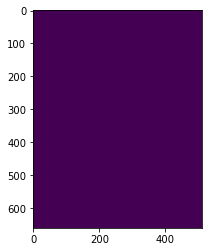

In [171]:
# binary_transformed = xdata.copy().flatten()
# binary_transformed[binary_transformed < 200] = 1
# binary_transformed[binary_transformed > 200] = 0
# binary_data = data.copy()
# binary_data[data > 1] = 0
# binary_data[data < 1] = 1

diff = binary_data.flatten() - binary_transformed
diff = diff.reshape(-1,512)
diff[diff>0] = 0
diff[diff<0] = 1

#diff = skimage.measure.block_reduce(diff, (16,16), np.mean)
diff = diff.reshape(16,-1,512)
for i in range (0,16):
    plt.imshow(diff[i])
    plt.show()

In [99]:
binary_transformed = xdata.copy().flatten()
binary_transformed[binary_transformed < 230] = 1
binary_transformed[binary_transformed > 230] = 0


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [2]:
res = Residue(["433d90f22cd87cb66139d491f753470f"], DATA_PATH, pca_model, repeating=False)
img = res.build_residue()
for i in range (0,16):
    plt.imshow(img[i])
    plt.show()

NameError: name 'Residue' is not defined

In [105]:
img[0].shape


(42, 32)

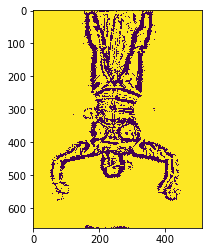

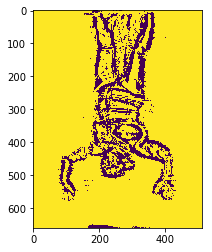

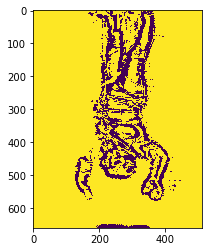

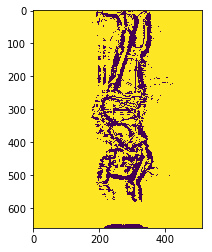

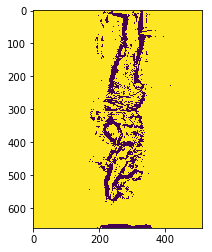

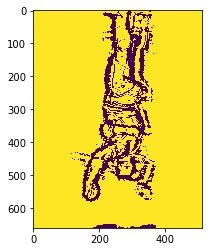

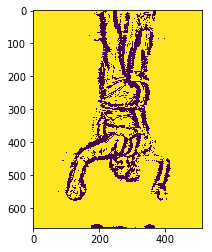

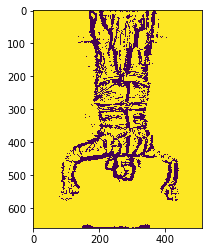

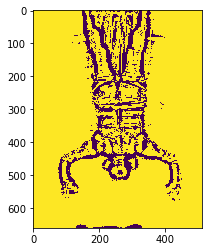

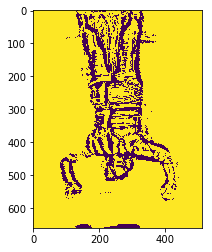

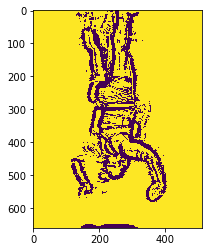

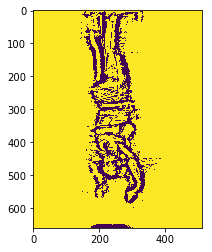

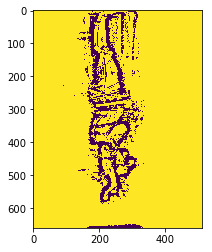

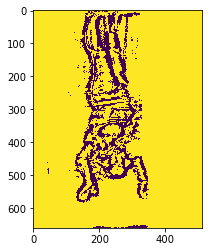

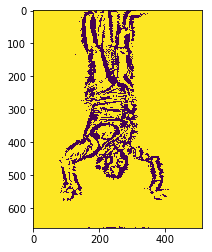

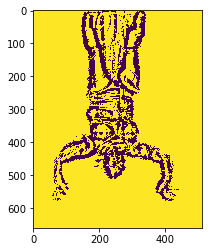

In [121]:
data = tsa_utils.read_data("./images/0367394485447c1c3485359ba71f52cb.aps").reshape(16 * 660, 512, order="A")
data *= 255/data.max() 
data = data.astype(np.uint8)
data = cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,25,3)
data = data.reshape(16, 660, 512, order="A")
for i in range(0,16):
    plt.imshow(data[i])
    plt.show()

In [9]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
# image_df=image_df.groupby("id").sum().reset_index()
image_df = image_df[image_df["zone"]=="Zone14"]
safe_labels = image_df[image_df["Probability"]== 0]["id"].unique()
unsafe_labels = image_df[image_df["Probability"]>0]["id"].unique()

In [10]:
iterator = tsa_utils.InputImagesIterator(unsafe_labels, DATA_PATH, contrast=10000, repeating=False)

In [11]:
scaled_iterator = tsa_utils.ScaledImagesIterator(unsafe_labels, DATA_PATH, repeating=False)

In [12]:
iterator.__next__().mean()

0.56967801

In [13]:
scaled_iterator.__next__().mean()

-0.022214387

In [ ]:
data = []
for image in unsafe_labels[:100]:
    data.append(tsa_utils.read_data(DATA_PATH + "/" + image + ".aps").flatten())
data = np.stack(data)

00360f79fd6e02781457eda48f85da90


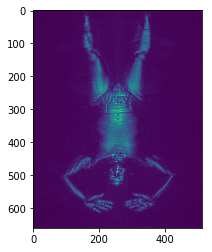

0043db5e8c819bffc15261b1f1ac5e42


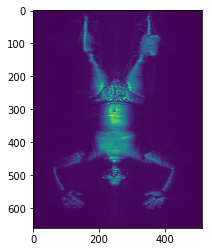

01c08047f617de893bef104fb309203a


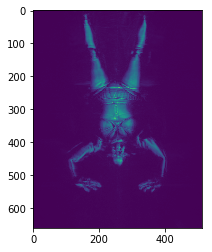

087d7648e320f02c2c41e029f6cc2cd0


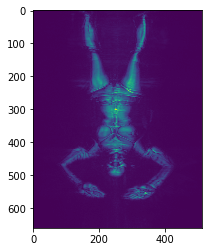

0ada538288f0b62b01510b397a8acb9e


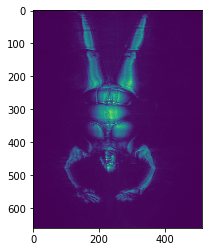

In [34]:
for i in range(0,5):
    print(unsafe_labels[i])
    data = iterator.__next__()
    plt.imshow(data[0])
    plt.show()

In [55]:
scaled = scale(data)

/Users/jasminefeldmann/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [26]:
plt.imshow(scaled[13].reshape(-1, 660, 512)[12])
plt.show()

NameError: name 'scaled' is not defined

In [63]:
unsafe_labels[13]

'2a1a3dd5e6cd896e85ba8eec69f2744b'